In [1]:
import pandas as pd

In [2]:
pwd

'/Users/wzhang/GeneralAssembly/DAT-06-24/house-prices-advanced-regression-techniques'

In [9]:
train = pd.read_csv('train.csv', usecols = [1,17,18,19,43,44,46,49,50,70,77,80])
test  = pd.read_csv('test.csv',  usecols = [1,17,18,19,43,44,46,49,50,70,77])

In [10]:
train.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,ScreenPorch,YrSold,SalePrice
0,60,7,5,2003,856,854,1710,2,1,0,2008,208500
1,20,6,8,1976,1262,0,1262,2,0,0,2007,181500
2,60,7,5,2001,920,866,1786,2,1,0,2008,223500
3,70,7,5,1915,961,756,1717,1,0,0,2006,140000
4,60,8,5,2000,1145,1053,2198,2,1,0,2008,250000


In [11]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [15]:
import numpy as np
from sklearn.model_selection import cross_val_score

In [30]:
X_train = train.loc[:,train.columns != 'SalePrice']
y_train = np.log(train.SalePrice)

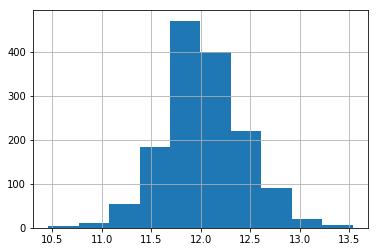

In [35]:
%matplotlib inline
y_train.hist()

In [36]:
def rmse(estimator, X, y):
    preds = estimator.predict(X)
    error = np.sqrt(np.mean((preds - y)**2))
    return error

In [44]:
features_m = [.5, 'log2','sqrt' ]
samples_per_leaf = [1,5,10,15,25,50]
rf_scores = []
for i in samples_per_leaf:
    rf.set_params(min_samples_leaf = i )
    scores = cross_val_score(estimator=rf, X=X_train, y=y_train, scoring = rmse, cv=10)
    rf_scores.append((np.mean(scores), i))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

In [45]:
rf_scores

[(0.16260503344512794, 1),
 (0.16136160702820065, 5),
 (0.16546307740207802, 10),
 (0.17103246234463015, 15),
 (0.17638213881554127, 25),
 (0.189903024331814, 50)]

In [46]:
min(rf_scores)  

(0.16136160702820065, 5)

In [47]:
rf.set_params(min_samples_leaf = 5)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [49]:
rf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [50]:
test['Prediction'] = rf.predict(test)

In [51]:
test.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,ScreenPorch,YrSold,Prediction
0,20,5,6,1961,896,0,896,1,0,120,2010,11.696431
1,20,6,6,1958,1329,0,1329,1,1,0,2010,11.948082
2,60,5,5,1997,928,701,1629,2,1,0,2010,12.109189
3,60,6,6,1998,926,678,1604,2,1,0,2010,12.115157
4,120,8,5,1992,1280,0,1280,2,0,144,2010,12.235019


In [56]:
np.exp(test.Prediction)

0       120142.140730
1       154520.514306
2       181532.315865
3       182618.857633
4       205873.893270
5       182224.979060
6       167793.138150
7       176449.292697
8       188157.968280
9       114515.417599
10      194543.623847
11       96241.667943
12      101121.989443
13      146482.971672
14      131516.142051
15      409915.173928
16      255220.886893
17      304501.564646
18      287796.365837
19      424070.045681
20      351126.730292
21      216349.063432
22      190587.417939
23      169590.841256
24      173195.236490
25      205697.845828
26      350945.660450
27      256879.252373
28      195994.253186
29      197178.272781
            ...      
1429     72356.845659
1430    142674.630619
1431     63831.456363
1432    140256.775238
1433     76222.725630
1434    277993.439997
1435    267265.576309
1436    198196.808451
1437    170356.046573
1438    241440.427292
1439    158162.523598
1440    163614.354768
1441    172496.057916
1442    321107.973697
1443    33

In [58]:
train.tail()

,MSSubClass,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,ScreenPorch,YrSold,SalePrice
1455,60,6,5,1999,953,694,1647,2,1,0,2007,175000
1456,20,6,6,1978,2073,0,2073,2,0,0,2010,210000
1457,70,7,9,1941,1188,1152,2340,2,0,0,2010,266500
1458,20,5,6,1950,1078,0,1078,1,0,0,2010,142125
1459,20,5,6,1965,1256,0,1256,1,1,0,2008,147500


In [59]:
submisstion = np.exp(test.Prediction)

In [60]:
submisstion.head()

0    120142.140730
1    154520.514306
2    181532.315865
3    182618.857633
4    205873.893270
Name: Prediction, dtype: float64

In [64]:
output = pd.DataFrame({
    'Id': np.arange(1461,2920),
    'SalePrice': np.exp(test.Prediction)
})

In [65]:
output.head()

,Id,SalePrice
0,1461,120142.140730
1,1462,154520.514306
2,1463,181532.315865
3,1464,182618.857633
4,1465,205873.893270


In [68]:
pwd

'/Users/wzhang/GeneralAssembly/DAT-06-24/house-prices-advanced-regression-techniques'

In [70]:
output.to_csv('/Users/wzhang/GeneralAssembly/DAT-06-24/house-prices-advanced-regression-techniques/submission/sample_submission.csv', index = False)